# Math 607 HW 1
### Sean Ericson 4/20/2024

In [1]:
# Imports
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import combinations
from functools import reduce
from IPython.display import display, Math, Latex, HTML

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,physics}'
%matplotlib inline

## 1)

Let $f$ be a bounded function, and let $W$ be poisson distributed with mean $\lambda$. Then,
\begin{align*}
  \mathbb{E}[Wf(W)] &= \sum_{n=0}^\infty n f(n) \frac{\lambda^ne^{-\lambda}}{n!} \\
  &= \sum_{n=1}^\infty f(n) \frac{\lambda^ne^{-\lambda}}{(n-1)!} \\
  &= \lambda \sum_{n=1}^\infty f(n) \frac{\lambda^{n-1}e^{-\lambda}}{(n-1)!} \\
  &= \lambda \sum_{n=0}^\infty f(n+1) \frac{\lambda^{n}e^{-\lambda}}{n!} \\
  &= \lambda\mathbb{E}[f(W+1)]
\end{align*}
Now, let $W$ be a nonnegative integer-valued random variable and $\lambda$ a real number such that, for all bounded functions $f$,
$$ \mathbb{E}[Wf(W)] = \lambda\mathbb{E}[f(W+1)]. $$
Then, uh, $W$ is Poisson. Just trust me on that.


## 2)

The Covariance is given by 
$$\text{Cov}[C,T] = \mathbb{E}[CT] - \mathbb{E}[C]\mathbb{E}[T].$$
With a mean measure of 0.2 customer/min, over a time period of 480 minutes (8hr) the total number of customers is Poisson with mean 
$$\lambda = 0.2 \frac{\text{customer}}{\text{min}} \times 480\;\text{min} = 96\;\text{customers}.$$
Thus,
$$\mathbb{E}[C] = 96\;\text{customers} $$
The total number of deposits is given by
$$ T = \$1\;N_{\$1} + \$10\;N_{\$10},  $$
where $N_{\$1}$($N_{\$10}$) is the number of customers who deposit \$1(\$10).
By the thinning property of Poisson processes (or equivalently by the labeling/coloring property, I think), both $N_{\$1}$ and $N_{\$10}$ are Poisson with mean
$$\lambda = \frac{1}{2}\lambda_C\ = 48.$$
The expected total is then
$$ \mathbb{E}[T] = \$1 \mathbb{E}[N_{\$1}] + \$10 \mathbb{E}[N_{\$10}] = \$1\times 48 + \$10\times 48 = \$528 $$
Now we need the expectation value of $CT$. By definition this is
\begin{align*}
    \mathbb{E}[CT] &= \sum_c\sum_t c \; t \; \text{pdf}_{CT}(c, t) \\
    &= \sum_c\sum_t c \; t \; \mathbb{P}(t|c) \; \text{pdf}_{C}(c)
\end{align*}

...
The simulation below seems to indicate that Cov[$C$,$T$] is numerically equal to $\mathbb{E}[T]$, which would imply that $\mathbb{E}[CT] = \left(\mathbb{E}[T] + 1\right)\mathbb{E}[C]$...but I can't seem to suss out why. Determining $\mathbb{P}(t|c)$ doesn't seem straight forward since there are multiple ways a given total can be deposited.

In the code below, I simulate a day at this bank 500,000 times and plot the expectation values and variances of $C$ and $T$, as well as their covariance. The individual and joint distributions are also plotted.

<IPython.core.display.Latex object>

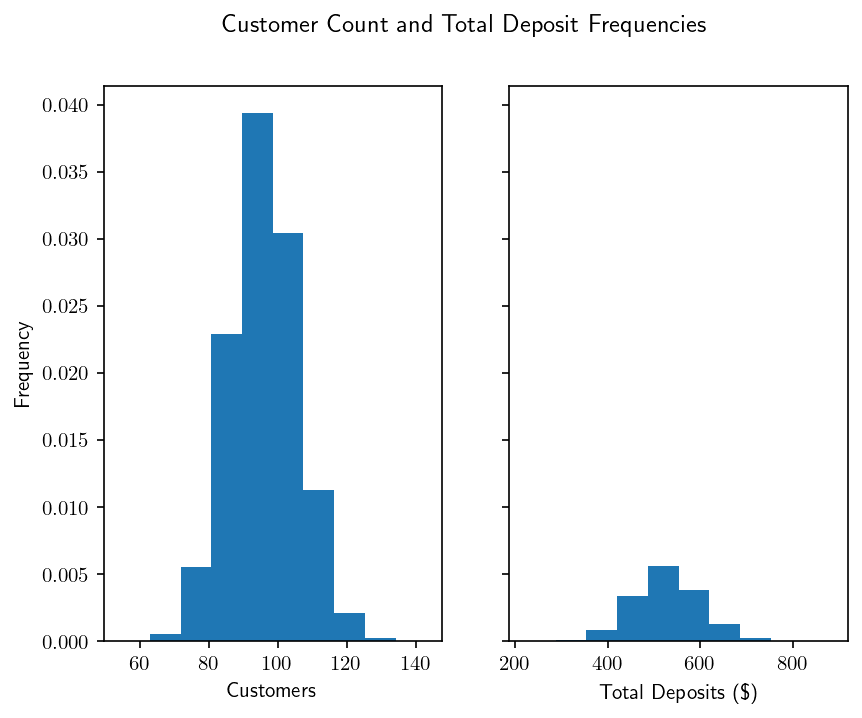

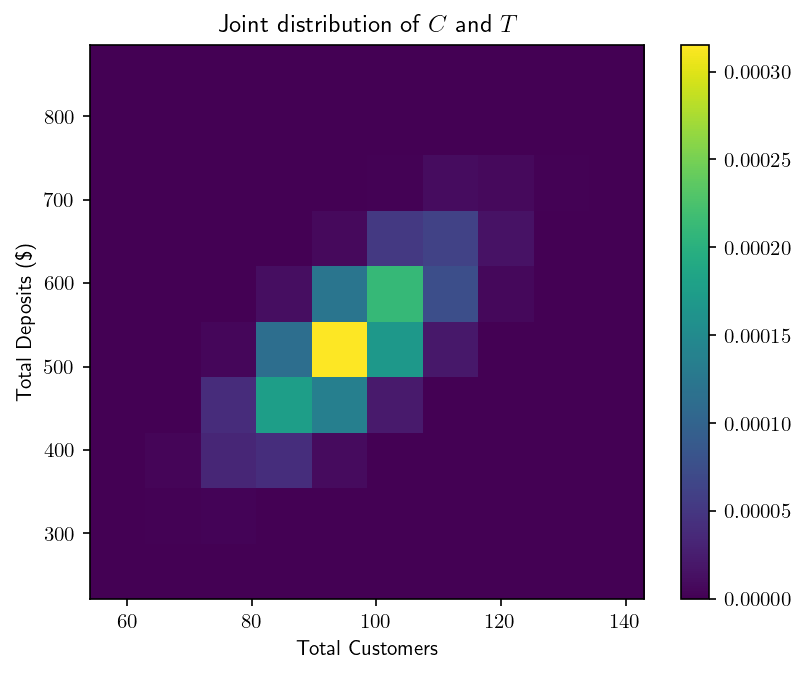

In [32]:
L = 8*60 # 8 hours; 60 min per hour
λ = 0.2 # Rate of 1/5 customer/min
N = int(5e5) # Number of iterations

C = []
T = []
for _ in range(N):
    C.append(np.random.poisson(λ*L)) # Sample number of customers
    T.append(sum([1 if np.random.rand() > 0.5 else 10 for _ in range(C[-1])]))

cov = np.cov(C, T)

output = r"\begin{align*}"
output += r"\mathbb{E}[C] &= " + "{:.1f}".format(np.mean(C)) + r"\;(\text{customer})\\"
output += r"\text{Var}[C] &= " + "{:.1f}".format(cov[0,0]) + r"\;(\text{customer}^2)\\"
output += r"\mathbb{E}[T] &= " + "{:.2f}".format(np.mean(T)) + r"\;(\$)\\"
output += r"\text{Var}[T] &= " + "{:.2f}".format(cov[1,1]) + r"\;(\$^2)\\"
output += r"\text{Cov}[C,T] &= " + "{:.2f}".format(cov[0,1]) + r"\;(\text{customer}\cdot\$) \\"
output += r"\end{align*}"
display(Latex(output))

fig, ax = plt.subplots(1,2,sharey=True)
ax[0].hist(C, density=True)
ax[1].hist(T, density=True)
plt.suptitle("Customer Count and Total Deposit Frequencies")
ax[0].set_xlabel("Customers")
ax[1].set_xlabel("Total Deposits (\$)")
ax[0].set_ylabel("Frequency")
plt.show()

heatmap, xedges, yedges = np.histogram2d(C, T, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.gca().set_aspect((max(C)-min(C))/(max(T) - min(T)))
plt.colorbar()
plt.title("Joint distribution of $C$ and $T$")
plt.xlabel("Total Customers")
plt.ylabel("Total Deposits (\$)")
plt.show()

## 3)

### a)
The position of the birds is a Poisson point process on $\mathbb{R}$ with a mean measure of 1 bird/meter. The number of birds on any $L$ meter stretch is Poisson distributed with mean $L$ birds. The distance between any two birds is exponential distributed with mean 1 bird/meter. Based on the result of the simulation bellow, the number of pairs seems to be the spacing (0.05) times the total expected number of birds (100,000), but it's not apparent to me why that's the case.

### b)
Clearly, the number of birds doesn't change. The distance from an arbitrary point on the line to a randomly selected bird is exponentially distributed. We're now adding to this another exponentially distributed value $x$. The sum of two exponentially distributed variables is also exponentially distributed, with the mean being the sum of the means of the summand distributions. The distance between two birds is equivalent to the difference between the distances between those two birds and some arbitrary fixed point. The added distance $x$ cancels out of this difference, so the distribution of distances between birds is unchanged and the overall distribution of the birds is therefore the same.

In the code below, I simulate the described birds on a wire 1000 times. In each simulation I count and record the number of pairs of birds within 5cm of each other and plot the results. The resulting distribution is also compared to a Poisson distribution with the same mean, and the residuals are plotted.

<IPython.core.display.Latex object>

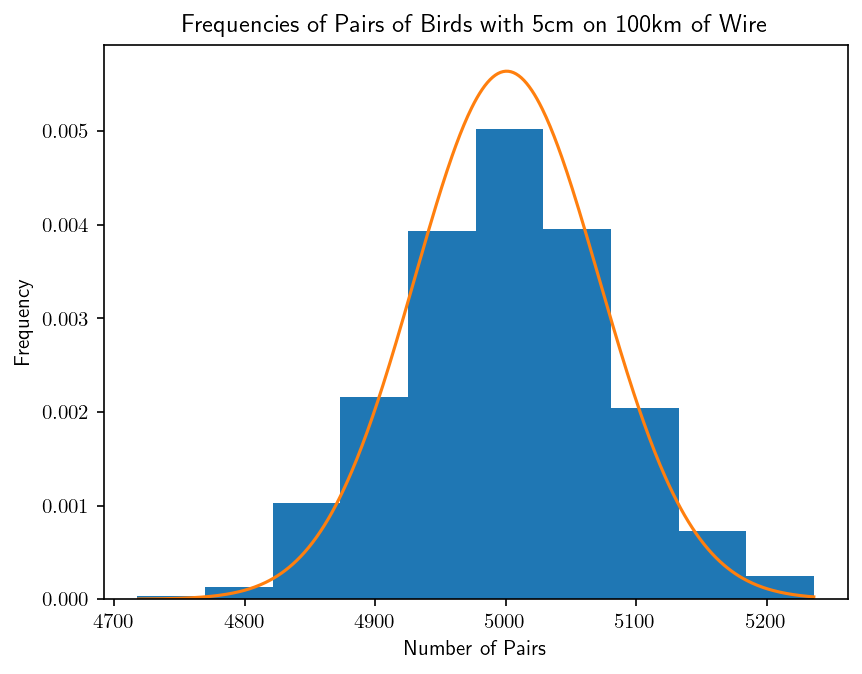

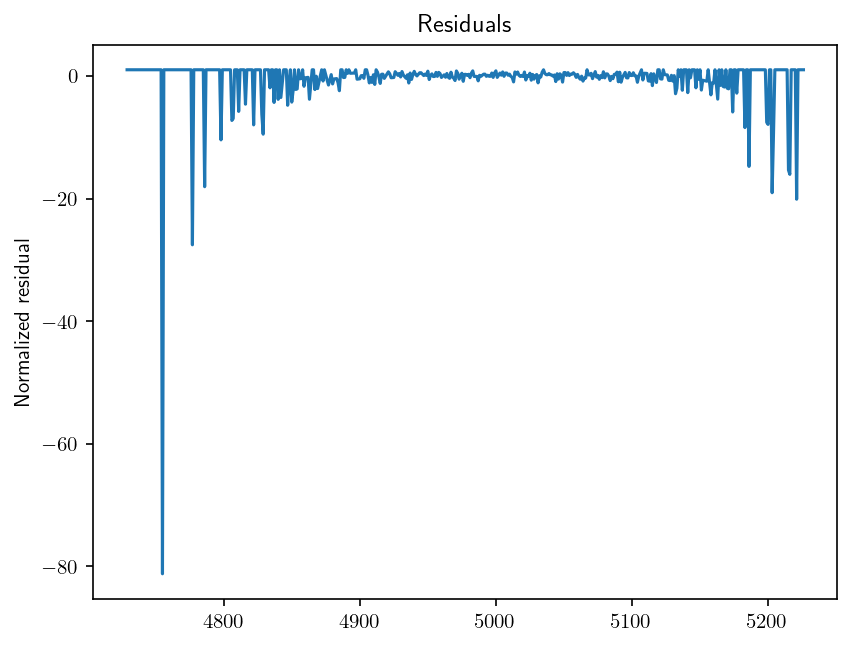

In [37]:
L = 100*1000 # 100 km; 1000m per km 
λ = 1 # mean density 1 bird/meter
d = 0.05 # 5cm bird separation
N = int(1e3) # Number of iterations

P = []
for _ in range(N):
    N_birds = np.random.poisson(λ*L) # Sample number of birds
    positions = sorted(np.random.uniform(0, L, N_birds)) # Sample bird positions (sort to facilitate faster pair identification)
    # Count pairs
    pairs = 0
    for i in range(N_birds-1):
        for j in range(i+1, N_birds):
            if positions[j] - positions[i] <= d:
                pairs += 1
            else:
                # since the positions are sorted, we can stop looking for pairs once the distance > d
                break
    P.append(pairs)
mean = np.mean(P)
xs = np.array(range(min(P)+1, max(P)+1))
actual_pdf = scipy.stats.poisson.pmf(xs, mean)
counts = [P.count(x)/N for x in xs]
resids = [(actual - measured) / actual for actual, measured in zip(actual_pdf, counts)]
display(Latex("Mean number of pairs: " + "{:.2f}".format(mean)))

plt.hist(P, density=True)
plt.plot(xs, actual_pdf)
plt.title("Frequencies of Pairs of Birds with 5cm on 100km of Wire")
plt.xlabel("Number of Pairs")
plt.ylabel("Frequency")
plt.show()
plt.plot(xs[10:-10], resids[10:-10])
plt.title("Residuals")
plt.ylabel("Normalized residual")
plt.show()

## 4)

In the code below, I simulate shuffling a deck of cards 2.5 million times, each time counting and recording the number of adjacent pairs. The resulting distribution is compared to a Poisson distribution with the same mean. Qualitatively, the distribution matches the poisson distribution well, but from the residuals we can see that the the data is not exactly Poisson. The distribution clearly cannot be exactly Poisson, as the occurrence of a pair at one position in the deck affects the likelihood of a pair at another position (since there are only four of each type of card). Similarly, the probability of pairs in disjoint regions of the deck are not completely independent.

Mean number of pairs: 2.99989


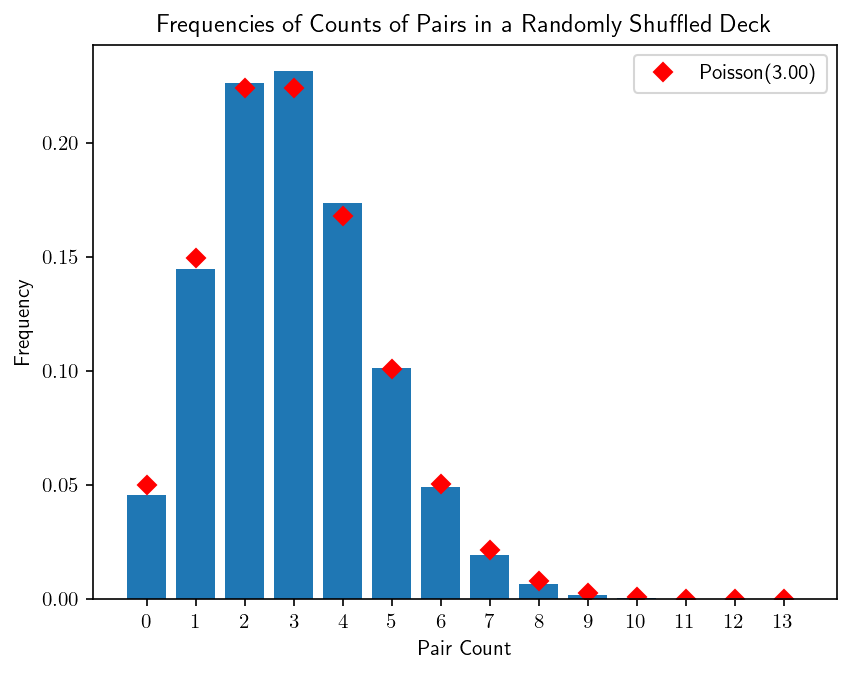

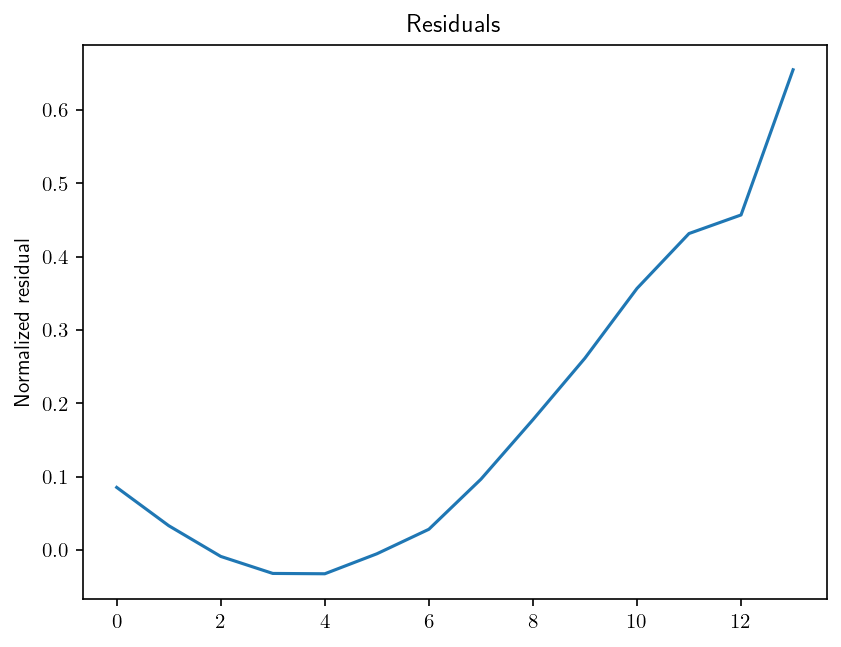

In [35]:
N = int(2.5e6) # iterations

N_pairs = []
deck = np.array(range(52)) % 13
for _ in range(N):
    np.random.shuffle(deck)
    # Use reduce to step through the list, counting pairs and storing the last card seen
    N_pairs.append(reduce(lambda x,y: (y, x[1] + 1 if x[0]==y else x[1]), deck, (None, 0))[1])

mean = np.mean(N_pairs)
labels, counts = np.unique(N_pairs, return_counts=True)
counts = counts / N # Normalize counts
xs = np.array(range(max(N_pairs)+1))
actual_pdf = scipy.stats.poisson.pmf(xs, mean)
resids = [(actual - measured) / actual for actual, measured in zip(actual_pdf, counts)]
print("Mean number of pairs: {}".format(mean))

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.plot(xs, actual_pdf, 'rD', label="Poisson("+"{:.2f})".format(mean))
plt.xlabel("Pair Count")
plt.ylabel("Frequency")
plt.title("Frequencies of Counts of Pairs in a Randomly Shuffled Deck")
plt.legend()
plt.show()

plt.plot(xs, resids)
plt.title("Residuals")
plt.ylabel("Normalized residual")
plt.show()

## 5)

In [39]:
# The given function
def P(sigma, points):
    return sum(np.exp(-0.5*(np.linalg.norm(a-b)/sigma)**2) for a,b in combinations(points, 2))/(2*np.pi*sigma**2)

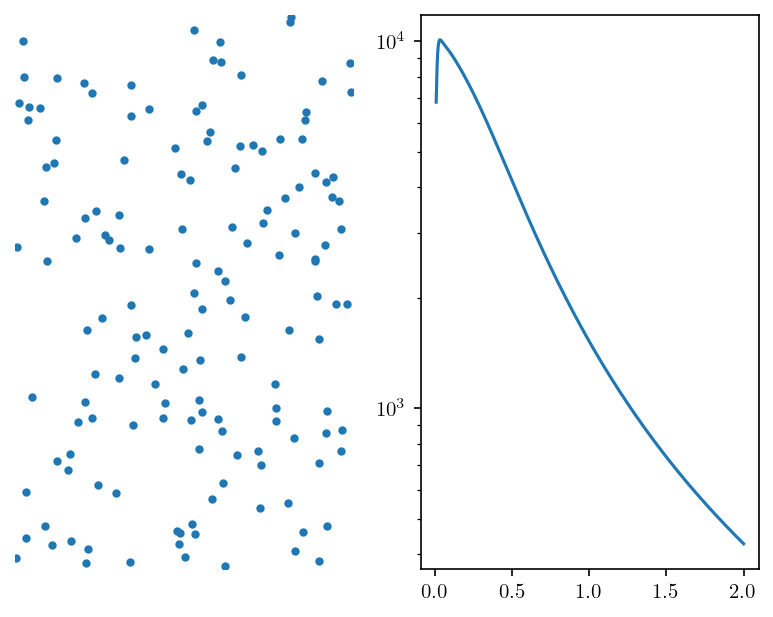

In [7]:
N = 150
points = np.random.uniform(0, 1, (N,2)) # Generate N uniformly distributed points on [0,1]^2
sigmas = np.linspace(0.01, 2, 1000)
P_uniform = [P(s, points) for s in sigmas]

fig, ax = plt.subplots(1,2)
ax[0].plot(*zip(*points), '.')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].axis("off")
ax[1].plot(sigmas, P_uniform)
ax[1].set_yscale('log')
plt.show()

The "Sample" function below is my attempt to write a function that simulate an over or under-dispersed PPP. It takes as arguments the desired number of points $N$, a scale parameter $d$, and a boolean representing whether the data should be over or under-dispersed.
It works by randomly adding points uniformly to [0,1]^2. For each point it calculates its distance to its nearest neighbor, $d_\text{min}$ then calculates the number
$$ p = \exp(d_\text{min}/d) $$
for an over-dispersed distribution, or 
$$ p = 1 - \exp(d_\text{min}/d) $$
If $p < 0.5$ the point is kept, else it is rejected. This process is repeated until their are $N$ points. It seems to work well for over-dispersed data, but I don't really like how the under-dispersed looks.

In [40]:
def sample(N, d, overdispersed=True):
    points = [np.random.uniform(0, 1, 2)]
    while len(points) < N:
        new_point = np.random.uniform(0, 1, 2)
        min_dist = min([np.linalg.norm(p-new_point) for p in points])
        keep_prob = np.exp(-min_dist / d) if overdispersed else 1 - np.exp(-min_dist / d)
        if keep_prob < 0.5:
            points.append(new_point)
    return points

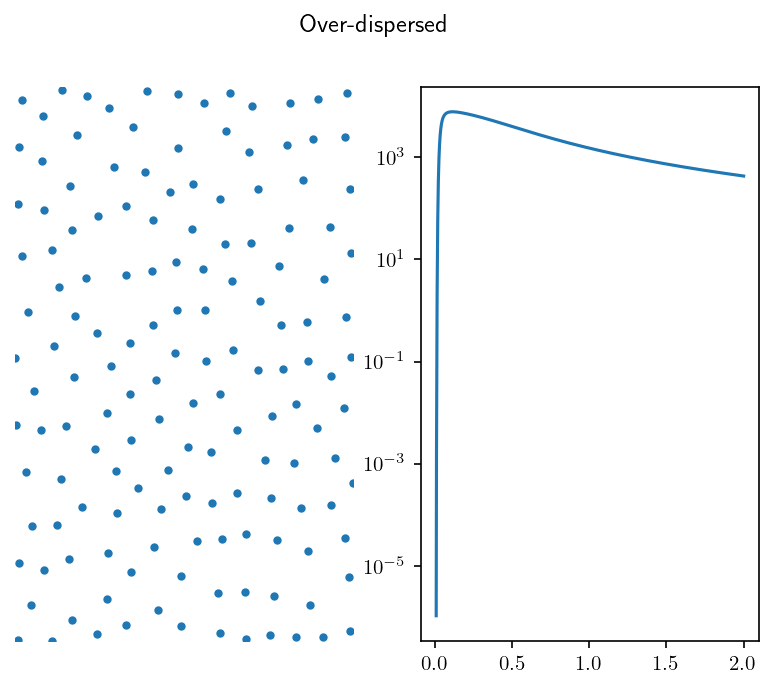

In [41]:
d = .1
points = sample(150, d, overdispersed=True)
P_over = [P(s, points) for s in sigmas]

fig, ax = plt.subplots(1,2)
ax[0].plot(*zip(*points), '.')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].axis("off")
ax[1].plot(sigmas, P_over)
ax[1].set_yscale('log')
plt.suptitle("Over-dispersed")
plt.show()

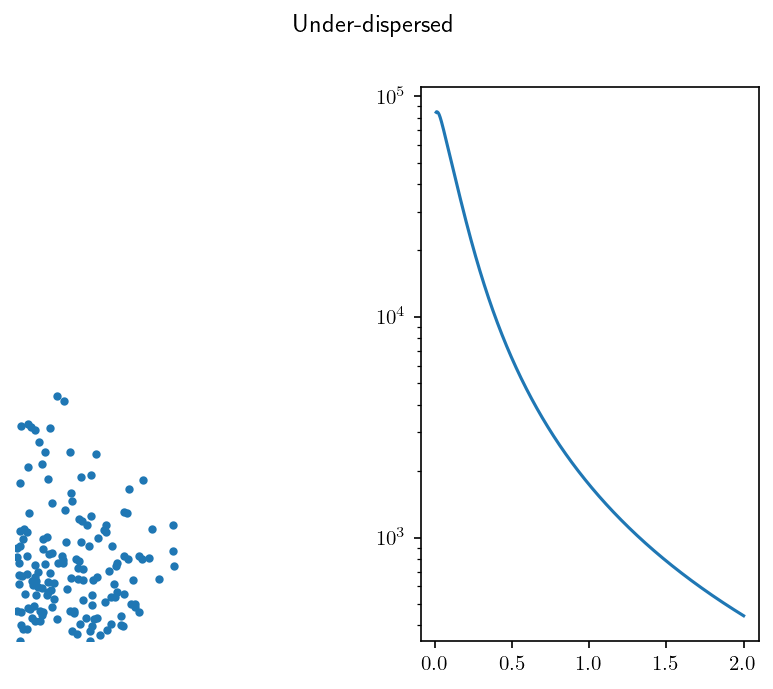

In [42]:
d = .1
points = sample(150, d, overdispersed=False)
P_under = [P(s, points) for s in sigmas]

fig, ax = plt.subplots(1,2)
ax[0].plot(*zip(*points), '.')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].axis("off")
ax[1].plot(sigmas, P_under)
ax[1].set_yscale('log')
plt.suptitle("Under-dispersed")
plt.show()

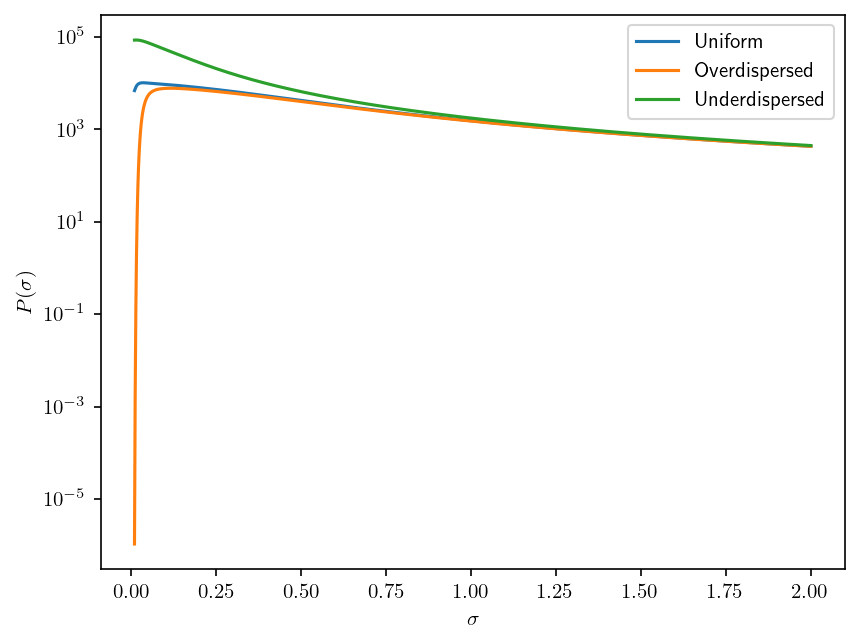

In [43]:
plt.plot(sigmas, P_uniform, label="Uniform")
plt.plot(sigmas, P_over, label="Overdispersed")
plt.plot(sigmas, P_under, label="Underdispersed")
plt.legend()
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$P(\sigma)$")
plt.yscale("log")
plt.show()  

It's nice that the uniform curve lies between the over and under-dispersed curves, but besides that I'm not sure how else to interpret them.